In [1]:
from spatialmath.base import *

T_0_1 = transl(0.5, 0.0, 0.0)
T_1_2 = trotz(90, 'deg')
T_2_3 = transl(0.0, 0.2, 0.0)
T_0_3 = T_0_1 @ T_1_2 @ T_2_3
print(T_0_3)

[[ 6.1232340e-17 -1.0000000e+00  0.0000000e+00  3.0000000e-01]
 [ 1.0000000e+00  6.1232340e-17  0.0000000e+00  1.2246468e-17]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]]


In [2]:
from spatialmath import *
T_01 = SE3(0.5, 0.0, 0.0) 
T_12 = SE3.Rz(90, unit = 'deg')
T_23 = SE3(0.0, 0.2, 0.0) 
T_03 = T_01 @ T_12 @ T_23
print(T_03)

print(T_03.eul())

print(T_03.t)

   0        -1         0         0.3       
   1         0         0         0         
   0         0         1         0         
   0         0         0         1         

[0.         0.         1.57079633]
[3.0000000e-01 1.2246468e-17 0.0000000e+00]


In [31]:
import roboticstoolbox as rtb
from math import pi

In [33]:
robot = rtb.DHRobot(
    [
        rtb.RevoluteMDH(d=1),
        rtb.RevoluteMDH(a=1, alpha = pi/2),
        rtb.RevoluteMDH(a=1),
    ],
    name = "RRR_Robot"
)

print(robot)

DHRobot: RRR_Robot, 3 joints (RRR), dynamics, modified DH parameters
┌─────┬───────┬─────┬─────┐
│aⱼ₋₁ │ ⍺ⱼ₋₁  │ θⱼ  │ dⱼ  │
├─────┼───────┼─────┼─────┤
│ 0.0 │  0.0° │  q1 │   1 │
│   1 │ 90.0° │  q2 │ 0.0 │
│   1 │  0.0° │  q3 │ 0.0 │
└─────┴───────┴─────┴─────┘

┌─┬──┐
└─┴──┘



In [42]:
q = [0, pi/2, 0]

T_0e = robot.fkine(q)
print(q)
print(T_0e)

[0, 1.5707963267948966, 0]
   0        -1         0         1         
   0         0        -1         0         
   1         0         0         2         
   0         0         0         1         



In [40]:
q_sol = robot.ik_LM(T_0e)
print(q_sol)

(array([-7.10542736e-15, -1.75188485e-06,  2.71373792e-06]), 1, 9, 1, 1.9971309307544396e-12)


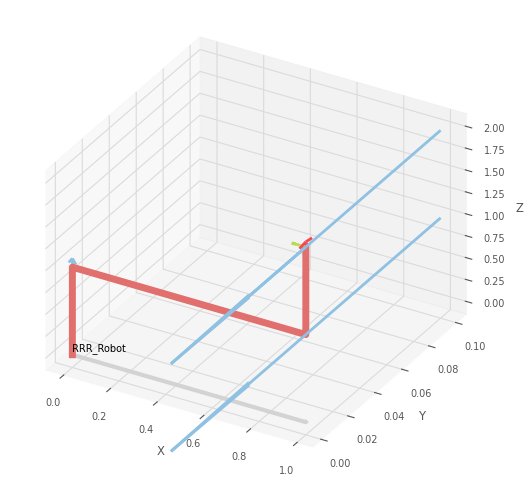

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'RRR_Robot')

<Figure size 640x480 with 0 Axes>

In [43]:
robot.plot(q)